<a href="https://colab.research.google.com/github/GuyWhoCodesThings/GuyWhoCodesThings/blob/main/MNIST_Upscale_Without_GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My first attempt at upscaling an image using a NN. This was before I looked into GANS so the model is pretty bad overall, but still a cool project. I will make an updated version of this shortly that will be much better at creating the numbers

In [2]:
import cv2
import numpy as np
import pandas as pd
from keras.datasets import mnist
import random

In [3]:
from matplotlib import pyplot
import tensorflow as tf

In [4]:
(train_Y, non_y), (test_Y, nan_y) = mnist.load_data()
train_Y.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [5]:
img_height, img_width = train_Y[0].shape
down_scaled_height, down_scaled_width = [14,14]
EPOCHS = 20
TRAIN_LENGTH = 1000
TEST_LENGTH = 500
train_Y = train_Y[:TRAIN_LENGTH]
test_Y = test_Y[:TEST_LENGTH]

In [6]:
train_Y = train_Y / 255.
test_Y = test_Y / 255.

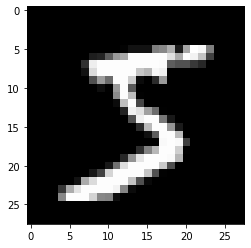

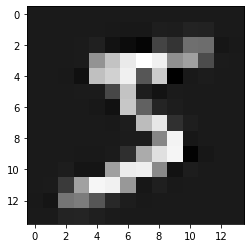

(14, 14)


In [7]:
img = train_Y[0]
pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))
pyplot.show()
res = cv2.resize(img, dsize=(down_scaled_width, down_scaled_height), interpolation=cv2.INTER_LANCZOS4) #INTER_LANCZOS4 or INTER_CUBIC
pyplot.imshow(res, cmap=pyplot.get_cmap('gray'))
pyplot.show()
print(res.shape)

In [8]:
train_X = []
for i in range(len(train_Y)):
  down_scaled = cv2.resize(train_Y[i], dsize=(down_scaled_width, down_scaled_height), interpolation=cv2.INTER_LANCZOS4)
  train_X = np.append(train_X, down_scaled).reshape(i+1,down_scaled_width, down_scaled_height)


In [9]:
test_X = []
for i in range(len(test_Y)):
  down_scaled = cv2.resize(train_Y[i], dsize=(down_scaled_width, down_scaled_height), interpolation=cv2.INTER_LANCZOS4)
  test_X = np.append(test_X, down_scaled).reshape(i+1,down_scaled_width, down_scaled_height)


In [10]:
train_Y = train_Y.reshape(TRAIN_LENGTH, img_height*img_width)
print(train_Y.shape)


(1000, 784)


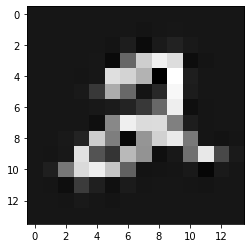

In [11]:
pyplot.imshow(train_X[random.randint(1,100)], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [12]:
train_X.shape

(1000, 14, 14)

In [13]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(10, (2, 2), activation='relu', input_shape=(down_scaled_height, down_scaled_width, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(6, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(392, activation='relu'),
    tf.keras.layers.Dense(784, activation='linear')
])

In [14]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimiser, 
    loss='mean_squared_error', 
    metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 10)        50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 10)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 6)           246       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 6)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 2, 2, 6)           0         
                                                                 
 flatten (Flatten)           (None, 24)                0

In [16]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1),
]

In [17]:
train_log = model.fit(
    train_X, train_Y,
    epochs=EPOCHS
    #callbacks=callbacks
)

Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 0.0787 - accuracy: 0.0070
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0644 - accuracy: 0.0050
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0615 - accuracy: 0.0120
Epoch 4/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0592 - accuracy: 0.0070
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0566 - accuracy: 0.0090
Epoch 6/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0540 - accuracy: 0.0100
Epoch 7/20
32/32 [==============================] - 1s 18ms/step - loss: 0.0520 - accuracy: 0.0090
Epoch 8/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0502 - accuracy: 0.0090
Epoch 9/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0493 - accuracy: 0.0090
Epoch 10/20
32/32 [==============================] - 1s 17ms/step - loss: 0.0481 - accuracy: 0.0070
Epoch 11/20
3

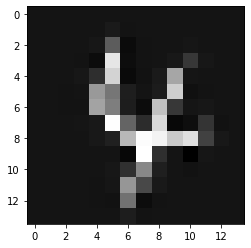

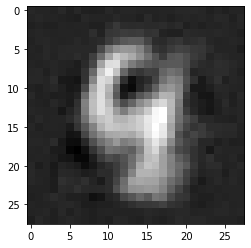

In [18]:
fefe = test_X[random.randint(1,500)].reshape(1,down_scaled_width, down_scaled_height)
pyplot.imshow(fefe.reshape(down_scaled_width, down_scaled_height), cmap=pyplot.get_cmap('gray'))
pyplot.show()
upscale_num = model.predict(fefe)
pyplot.imshow(upscale_num.reshape(28,28), cmap=pyplot.get_cmap('gray'))
pyplot.show()

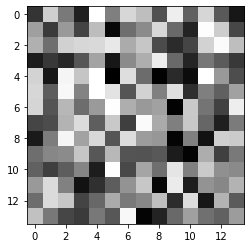

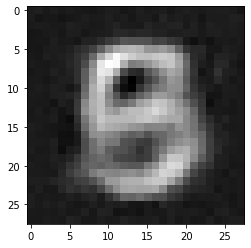

In [19]:
noise = np.random.rand(196).reshape(1,down_scaled_width, down_scaled_height)
pyplot.imshow(noise.reshape(down_scaled_width, down_scaled_height), cmap=pyplot.get_cmap('gray'))
pyplot.show()
upscale_num = model.predict(noise)
pyplot.imshow(upscale_num.reshape(28,28), cmap=pyplot.get_cmap('gray'))
pyplot.show()

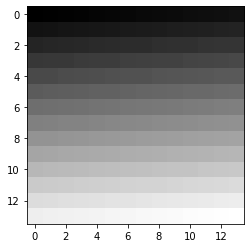

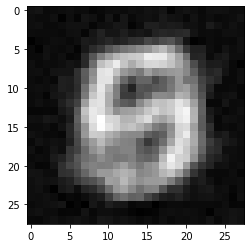

In [20]:
gradient = np.arange(196).reshape(1,down_scaled_width, down_scaled_height)
pyplot.imshow(gradient.reshape(down_scaled_width, down_scaled_height), cmap=pyplot.get_cmap('gray'))
pyplot.show()
upscale_num = model.predict(gradient)
pyplot.imshow(upscale_num.reshape(28,28), cmap=pyplot.get_cmap('gray'))
pyplot.show()